In [3]:
from sympy import *

In [60]:
x, y, th0, th1, t1 = symbols('x y Theta_0 Theta_1 t_1', real=True, positive=True)
sig_sq, sig1_sq = symbols('sigma__2 sigma_1__2', real=True, positive=True)

In [64]:
mu = th0 + th1*x
likelihood = exp(-(y-mu)**2/(2*sig_sq))
prior=exp(-(th1-t1)**2/(2*sig1_sq))
posterior=likelihood*prior
posterior=posterior.simplify()

In [65]:
norm = integrate(posterior, (th0, -oo, oo), (th1, -oo, oo)).simplify()
posterior = posterior / norm
posterior

exp(-(Theta_0 + Theta_1*x - y)**2/(2*sigma__2) - (Theta_1 - t_1)**2/(2*sigma_1__2))/(2*pi*sqrt(sigma_1__2)*sqrt(sigma__2))

In [66]:
marginal = integrate(posterior, (th1, -oo, oo)).simplify()
marginal

sqrt(2)*exp((sigma_1__2*(-Theta_0**2 + 2*Theta_0*y - y**2) - sigma__2*t_1**2 + (-Theta_0*sigma_1__2*x + sigma_1__2*x*y + sigma__2*t_1)**2/(sigma_1__2*x**2 + sigma__2))/(2*sigma_1__2*sigma__2))/(2*sqrt(pi)*sqrt(sigma_1__2*x**2 + sigma__2))

In [67]:
integrate(marginal, (th0, -oo, oo)).simplify()

1

In [152]:
marginal.subs([(x,1), (t1, 4), (y,1), (sig_sq, 1), (sig1_sq, 1)]).simplify()

exp(-Theta_0**2/2 + Theta_0 + (5 - Theta_0)**2/4 - 17/2)/(2*sqrt(pi))

In [ ]:
lambda_function = lambdify((th0, t1), marginal.subs([(x, 1), (y,0), (sig_sq, 1), (sig1_sq, 1)]), "numpy")

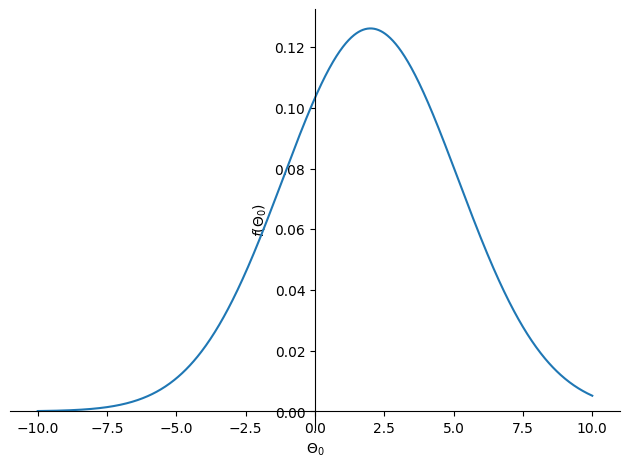

In [76]:
plot(marginal.subs([(x,3), (t1, 1), (y,5), (sig_sq, 1), (sig1_sq, 1)]), (th0, -10,10))

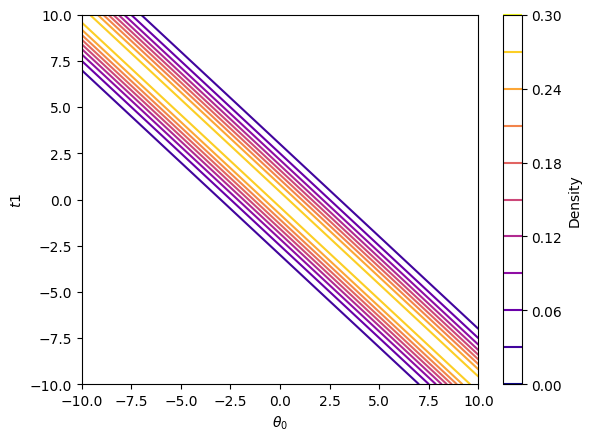

In [141]:
import numpy as np
import matplotlib.pyplot as plt

def plot_2d_pdf_contour(lambda_function, x_range=(-10, 10), y_range=(-10, 10), resolution=100):
    x = np.linspace(x_range[0], x_range[1], resolution)
    y = np.linspace(y_range[0], y_range[1], resolution)
    X, Y = np.meshgrid(x, y)
    
    Z = lambda_function(X, Y)

    plt.contour(X, Y, Z, cmap='plasma', levels=10)
    plt.xlabel(r'$\theta_0$')
    plt.ylabel(r'$t1$')
    plt.colorbar(label='Density')
    plt.show()

lambda_function = lambdify((th0, t1), marginal.subs([(x, 1), (y,0), (sig_sq, 1), (sig1_sq, 1)]), "numpy")
plot_2d_pdf_contour(lambda_function)